# 导入包

In [1]:
#
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


# 数据探索
## 训练集

### 数据初步观察与清洗

In [2]:
train_data=pd.read_csv("train.csv",parse_dates = [2],low_memory = False)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

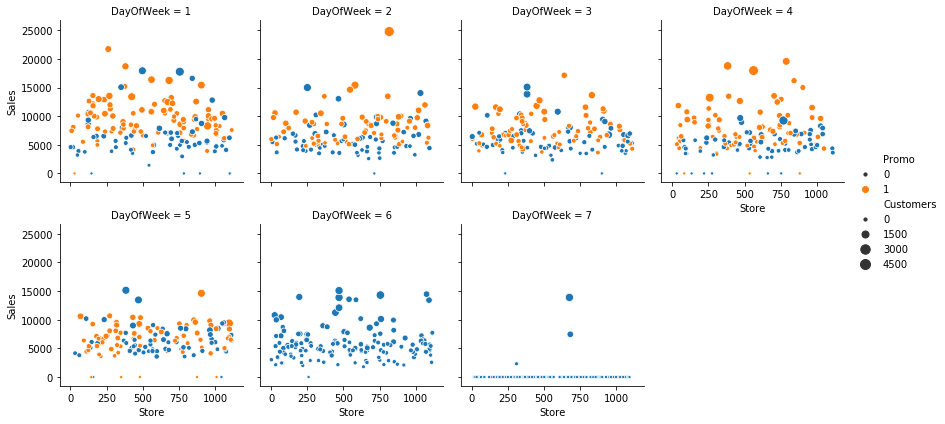

In [5]:
sns.relplot(x="Store", y="Sales", hue="Promo",size="Customers",col="DayOfWeek",sizes=(10,100),col_wrap=4,height=3,data=train_data.sample(frac=0.001,random_state=1))

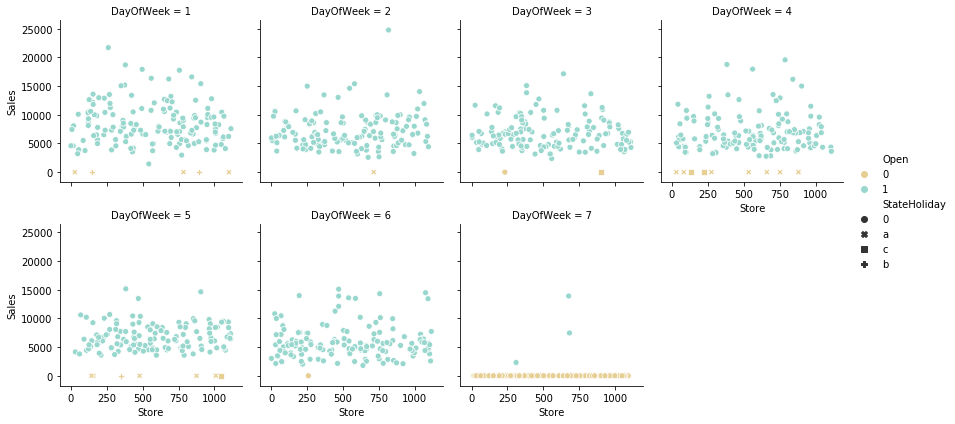

In [6]:
sns.relplot(x="Store", y="Sales", hue="Open",style="StateHoliday",col="DayOfWeek", palette="BrBG",col_wrap=4,height=3,data=train_data.sample(frac=0.001,random_state=1))

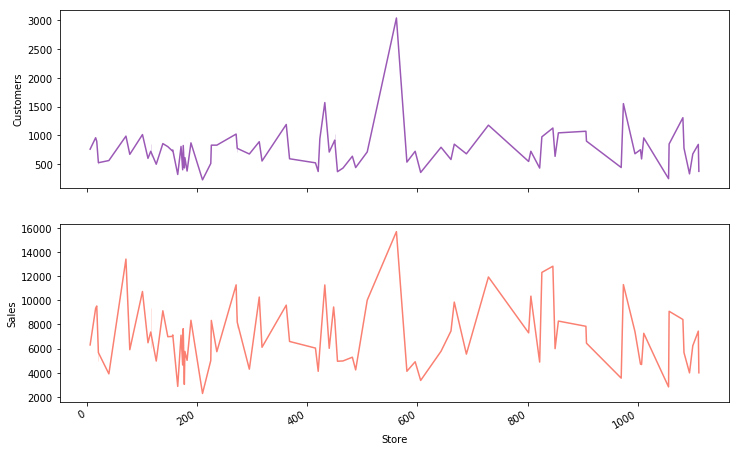

In [7]:
#
figbar, axesbar = plt.subplots(2, 1, sharey=False, figsize=(12, 8))
sns.lineplot(x="Store", y="Customers", color="#9b59b6",ax=axesbar[0],data=train_data[train_data["Sales"]>0].sample(frac=0.0001,random_state=1))
sns.lineplot(x="Store", y="Sales", color="salmon",ax=axesbar[1],data=train_data[train_data["Sales"]>0].sample(frac=0.0001,random_state=1))
figbar.autofmt_xdate()

可以看到顾客量的趋势与销量的趋势具有很高的相识性，所以这里加入一个新的特征--‘人均消费额（SalePerCustomer）’

In [8]:
train_data["SalePerCustomer"]=train_data["Sales"]/train_data["Customers"]

### 时序观察

D:\Anaconda\envs\data_science\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


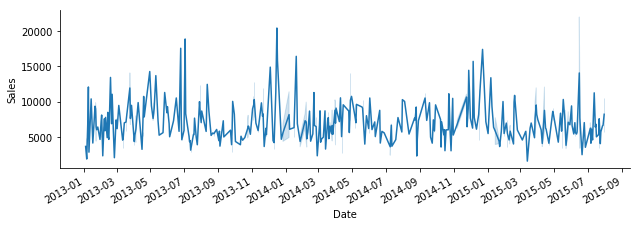

In [9]:
#
train_sales = train_data[train_data["Sales"]>0]

gsales=sns.relplot(x="Date",y="Sales",kind="line",height=3,aspect=3,data=train_sales.sample(frac=0.0005,random_state=1))
gsales.ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#g.ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
gsales.fig.autofmt_xdate()

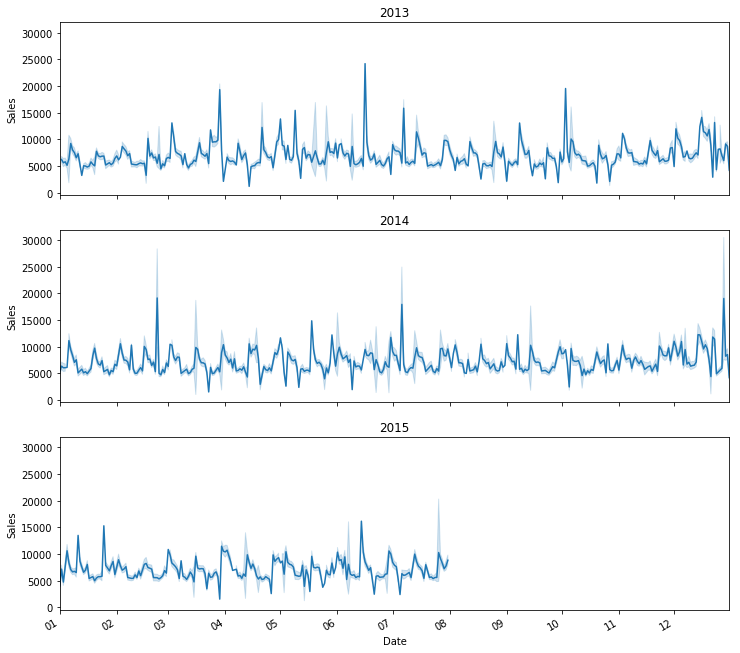

In [10]:
#
fig, axes = plt.subplots(3, 1, sharey=False, figsize=(12, 12))

for n in list(range(3)):
    #axes[n].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
    #axes[n].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
    axes[n].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axes[n].xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    
sns.lineplot(x="Date",y="Sales",data=train_sales.sample(frac=0.05,random_state=1),ax=axes[0])
axes[0].set_xlim('2013-1-1','2013-12-31')
axes[0].set_title('2013')

sns.lineplot(x="Date",y="Sales",data=train_sales.sample(frac=0.05,random_state=1),ax=axes[1])
axes[1].set_xlim('2014-1-1','2014-12-31')
axes[1].set_title('2014')

sns.lineplot(x="Date",y="Sales",data=train_sales.sample(frac=0.05,random_state=1),ax=axes[2])
axes[2].set_xlim('2015-1-1','2015-12-31')
axes[2].set_title('2015')

fig.autofmt_xdate()

从图中看出6-7月与8-9月的趋势变化相似

## 商店数据

### 数据初步观察与清洗

In [18]:
store_data = pd.read_csv("store.csv")
store_data.head(n=5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [20]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [21]:
store_data[pd.isnull(store_data.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [22]:
store_data[pd.isnull(store_data.CompetitionOpenSinceMonth)].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [23]:
no_promo = store_data[pd.isnull(store_data.Promo2SinceWeek)]
no_promo[no_promo["Promo2"]==0].shape

(544, 10)

Promo2SinceWeek/Year 数据缺失是由于promo为0，所以将缺失项目都用0填充;CompetitionDistance等三项数据缺失原因不明，先以均值填充看看效果。

In [24]:
store_data["Promo2SinceWeek"].fillna(0,inplace=True)
store_data["Promo2SinceYear"].fillna(0,inplace=True)
store_data["PromoInterval"].fillna(0,inplace=True)
store_data["CompetitionDistance"].fillna(store_data["CompetitionDistance"].mean(),inplace=True)
store_data["CompetitionOpenSinceMonth"].fillna(store_data["CompetitionOpenSinceMonth"].mean(),inplace=True)
store_data["CompetitionOpenSinceYear"].fillna(store_data["CompetitionOpenSinceYear"].mean(),inplace=True)


## 与训练集融合进一步分析店铺状况

In [25]:
train_store_data = pd.merge(train_data,store_data,on="Store")
train_store_data = train_store_data[(train_store_data['Open']==1)&(train_store_data['Sales']>0)]

### 店铺种类分布情况

In [26]:
temp_tsd = train_store_data.groupby("StoreType")
tsdTpye_describe = temp_tsd.describe()
tsdTpye_describe

Store                                                     \
              count        mean         std   min    25%    50%    75%   
StoreType                                                                
a          457042.0  560.087410  325.810963   2.0  276.0  557.0  848.0   
b           15560.0  555.930077  286.817822  85.0  335.0  512.0  733.0   
c          112968.0  608.222337  325.611777   1.0  362.0  613.0  897.0   
d          258768.0  533.887432  311.987681  13.0  250.0  529.0  792.0   

                  DayOfWeek            ... Promo2SinceWeek        \
              max     count      mean  ...             75%   max   
StoreType                              ...                         
a          1114.0  457042.0  3.513502  ...            18.0  48.0   
b          1097.0   15560.0  3.998586  ...             5.0  48.0   
c          1112.0  112968.0  3.506400  ...            14.0  50.0   
d          1115.0  258768.0  3.509777  ...            28.0  49.0   

          Promo2SinceYear                                                      \
                    count         mean          std  min  25%     50%     75%   
StoreType                                                                       
a                457042.0   937.555750  1003.606049  0.0  0.0     0.0  2012.0   
b                 15560.0   580.940938   912.070935  0.0  0.0     0.0  2012.0   
c                112968.0  1000.889526  1005.761586  0.0  0.0     0.0  2011.0   
d                258768.0  1145.546053   996.075785  0.0  0.0  2009.0  2012.0   

                   
              max  
StoreType          
a          2015.0  
b          2013.0  
c          2014.0  
d          2015.0  

[4 rows x 112 columns]

([<matplotlib.patches.Wedge at 0x15c82a8f748>,
 [Text(-0.1423300006246476, 1.090753029297736, 'a'),
  Text(-1.045053484076021, -0.3433121253619944, 'b'),
  Text(-0.7698195044469102, -0.7857340075197928, 'c'),
  Text(0.6283304377448313, -0.9028847440307034, 'd')],
 [Text(-0.07763454579526231, 0.5949561977987651, '54%'),
  Text(-0.570029173132375, -0.18726115928836057, '2%'),
  Text(-0.4199015478801328, -0.428582185919887, '13%'),
  Text(0.3427256933153625, -0.49248258765311087, '31%')])

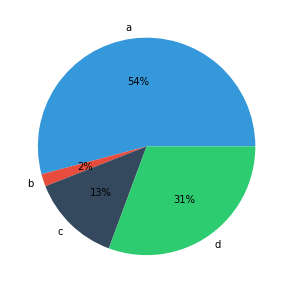

In [27]:
fracs = [tsdTpye_describe.iloc[0,0],tsdTpye_describe.iloc[1,0],tsdTpye_describe.iloc[2,0],tsdTpye_describe.iloc[3,0]]

fig = plt.figure(figsize=(5,5))
plt.pie(fracs, labels=tsdTpye_describe.index, colors=[ "#3498db", "#e74c3c", "#34495e", "#2ecc71"],autopct='%.0f%%')

### 不同类型销售量

In [28]:
temp_tsd['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


**将日期划分为年月日，便于根据分析年份与月份等分析数据**

In [29]:
#
train_store_data['Year']=train_store_data.Date.dt.year
train_store_data['Month']=train_store_data.Date.dt.month
train_store_data['Day']=train_store_data.Date.dt.day
train_store_data["WeekOfYear"]=train_store_data.Date.dt.weekofyear
train_store_data["Season"]=train_store_data.Date.dt.quarter
train_store_data['SeasonOfYear']=train_store_data['Year'].replace({2013:'2013',2014:'2014',2015:'2015'})+train_store_data["Season"].replace({1:'1',2:'2',3:'3',4:'4'})
#train_store_data["week"]=train_store_data.Date.dt.weekday # 星期

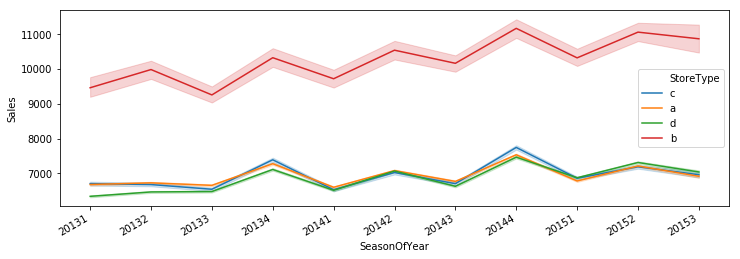

In [30]:
#
figtype, axestype = plt.subplots(1, 1, sharey=False, figsize=(12, 4))
sns.lineplot(x="SeasonOfYear", y="Sales",hue="StoreType",data=train_store_data,ax=axestype)
figtype.autofmt_xdate()

可以看到B类店铺平均销量原高于其他三类店铺，并且在2013年到2015年间保持稳定增长，而其他三类店铺则几乎没有改变，并且B类商铺要比其他三类商铺的季度波动性更强。

还可以看到四类店铺的销售额在第四季度都会有所上涨，有必要具体看看是哪个月份上涨最多。同时观察顾客量与人均销售额的趋势，因为这两项是影响销售额的直接原因。

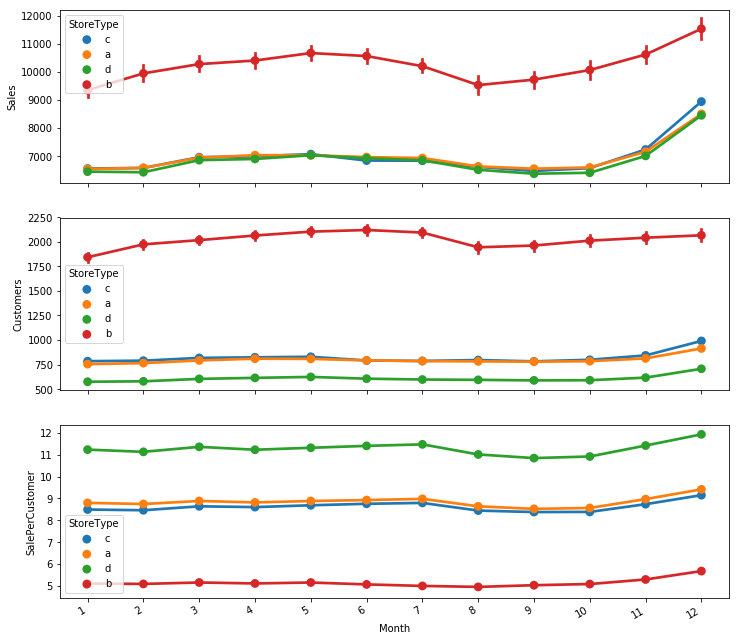

In [31]:
#
figMon_Sale_Cus, axesMon_Sale_Cus = plt.subplots(3, 1, sharey=False, figsize=(12, 12))
sns.pointplot(x="Month", y="Sales",hue="StoreType",data=train_store_data,ax=axesMon_Sale_Cus[0])
sns.pointplot(x="Month", y="Customers",hue="StoreType",data=train_store_data,ax=axesMon_Sale_Cus[1])
sns.pointplot(x="Month", y="SalePerCustomer",hue="StoreType",data=train_store_data,ax=axesMon_Sale_Cus[2])

figMon_Sale_Cus.autofmt_xdate()

四类店铺的销售、顾客量的峰值都在12月份出现，但还可以发现B类店铺的高销售额是靠大量的顾客换取的，也就是说这些顾客人均消费非常低，相反D类店铺的人均消费是最高的。

### 促销与销售额关系

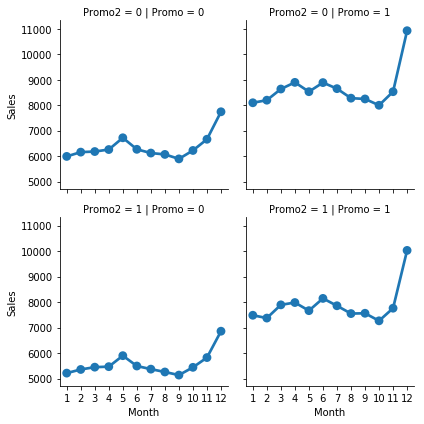

In [38]:
sns.catplot(x='Month',y='Sales',col='Promo',row='Promo2',kind='point',height=3,aspect=1,data=train_store_data)

从图中可之有短期促销的店铺销量要大于无短期促销的店铺销量；有长期促销的店铺销量低于无长期促销的店铺销量

### 节假日与销售额关系

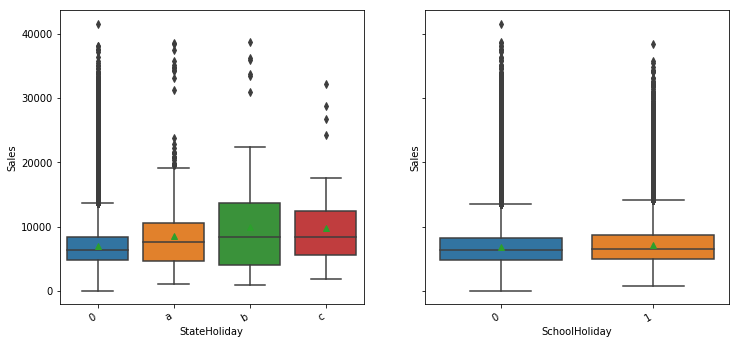

In [36]:
#
figHoli,axesHoli = plt.subplots(1,2,sharex=False,sharey=True,figsize=(12,6))

sns.boxplot(x="StateHoliday",y="Sales",
            showmeans=True,
            data=train_store_data,
            ax=axesHoli[0])
sns.boxplot(x="SchoolHoliday",y="Sales",
            showmeans=True,
            data=train_store_data,
            ax=axesHoli[1])

figHoli.autofmt_xdate()

从箱线图可发现在节假日开门的商铺的销售额要大于平日的销售额,在学校假期期间商铺的销售额也会略高于平日。

### 竞争对手与销售额关系

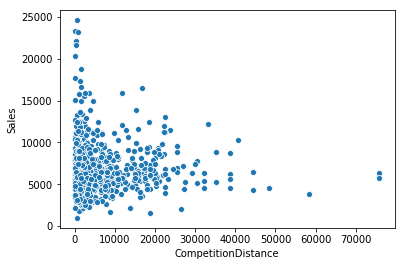

In [39]:
sns.scatterplot(x="CompetitionDistance", y="Sales",data=train_store_data.sample(frac=0.001,random_state=1))
#sns.jointplot(x="CompetitionDistance", y="Sales", data=train_store_data.sample(frac=0.0005,random_state=1));

从图中无法看出竞争对手的距离与销售额有非常必然的联系。


**构建竞争对手开业时间与促销时间特征：**

In [49]:
#
train_store_data['CompetitionOpen'] = 12 * (train_store_data.Year - train_store_data.CompetitionOpenSinceYear) + (train_store_data.Month - train_store_data.CompetitionOpenSinceMonth)
train_store_data['PromoOpen'] = 12 * (train_store_data.Year - train_store_data.Promo2SinceYear) + (train_store_data.WeekOfYear - train_store_data.Promo2SinceWeek) / 4.0
train_store_data.loc[train_store_data.Promo2SinceYear==0,'PromoOpen']=0

In [50]:
train_store_data.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,10.958105,61.115771
b,10233.380141,2022.211825,3.717593,66.607652
c,6933.126425,815.538073,13.964386,62.149077
d,6822.300064,606.353935,14.827699,57.808354


### 总体关联性

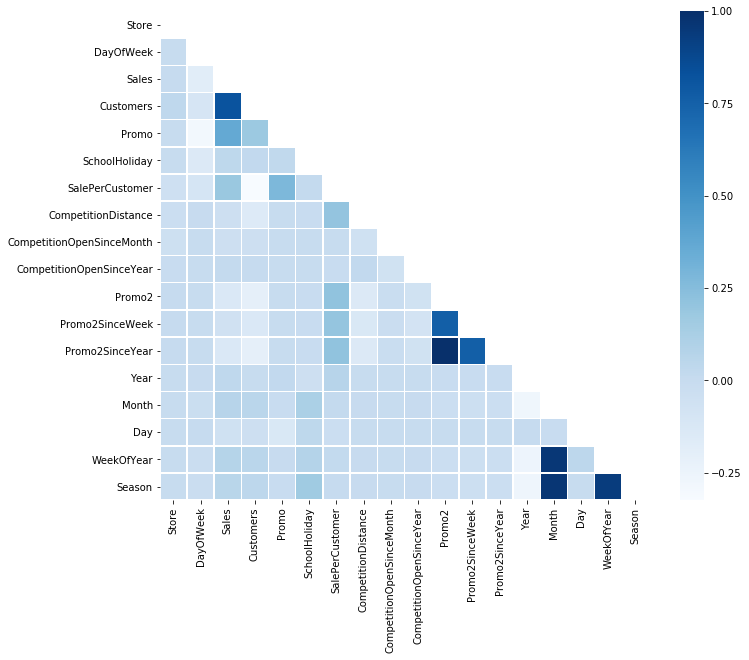

In [40]:
f, ax = plt.subplots(figsize = (11, 9))
                     
corr = train_store_data.drop("Open",axis=1).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "Blues")

## 测试集

### 数据初步观察与清洗

In [43]:
test_data=pd.read_csv("test.csv",parse_dates = [3],low_memory = False)
test_data.head(n=5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [44]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [45]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [46]:
test_data[pd.isnull(test_data.Open)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


缺失数据来只622号店铺，时间从周一到周六，不是假日时间，且有几天还在促销，故认为是正常营业状态，以1填充缺失数据。

In [47]:
test_data["Open"].fillna(1,inplace=True)

### 合并数据

In [48]:
test_store_data = pd.merge(test_data,store_data,on="Store")

In [49]:
test_store_data.head(n=3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### 构建特征

In [58]:
#
test_store_data['Year']=test_store_data.Date.dt.year
test_store_data['Month']=test_store_data.Date.dt.month
test_store_data['Day']=test_store_data.Date.dt.day
test_store_data["WeekOfYear"]=test_store_data.Date.dt.weekofyear
test_store_data["Season"]=test_store_data.Date.dt.quarter

test_store_data['CompetitionOpen'] = 12 * (test_store_data.Year - test_store_data.CompetitionOpenSinceYear) + (test_store_data.Month - test_store_data.CompetitionOpenSinceMonth)
test_store_data['PromoOpen'] = 12 * (test_store_data.Year - test_store_data.Promo2SinceYear) + (test_store_data.WeekOfYear - test_store_data.Promo2SinceWeek) / 4.0
test_store_data.loc[test_store_data.Promo2SinceYear==0,'PromoOpen']=0

## 特征处理
### 特征转换

In [41]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
train_store_data.Assortment.replace(mappings,inplace=True)
train_store_data.StateHoliday.replace(mappings,inplace=True)
train_store_data.StoreType.replace(mappings,inplace=True)

In [55]:
test_store_data.Assortment.replace(mappings,inplace=True)
test_store_data.StateHoliday.replace(mappings,inplace=True)
test_store_data.StoreType.replace(mappings,inplace=True)

### 删除不必要特征

In [53]:
train_store_data.drop(['Date','Customers','Open','PromoInterval','SeasonOfYear'], axis = 1, inplace = True)

In [56]:
test_store_data.drop(['Id','Date','Open','PromoInterval'], axis = 1, inplace = True)

### 拆分待预测特征标签

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [62]:
train_store_x = train_store_data.drop(['Sales'],axis=1)
train_store_y = np.log(train_store_data['Sales'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train_store_x, train_store_y, test_size = 0.3, random_state = 42)

In [85]:
X_train['Assortment'] = X_train['Assortment'].astype('int')
X_train['StateHoliday'] = X_train['StateHoliday'].astype('int')

Exception ignored in: <function DMatrix.__del__ at 0x0000015C92019D90>
Traceback (most recent call last):
  File "D:\Anaconda\envs\data_science\lib\site-packages\xgboost\core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
D:\Anaconda\envs\data_science\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\data_science\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

In [87]:
X_test['Assortment'] = X_test['Assortment'].astype('int')
X_test['StateHoliday'] = X_test['StateHoliday'].astype('int')

D:\Anaconda\envs\data_science\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\data_science\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 定义评价函数

In [65]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat / y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y, yhat)

## 初始模型

### 参数设定

In [66]:
params = {
    'booster': 'gbtree', 
    'objective': 'reg:linear', # regression task
    'subsample': 0.8, # 80% of data to grow trees and prevent overfitting
    'colsample_bytree': 0.85, # 85% of features used
    'eta': 0.1, 
    'max_depth': 10, 
    'seed': 42} 

### 模型训练

In [68]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [89]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_model = xgb.train(params, dtrain, 300, evals = watchlist,
                      early_stopping_rounds = 50, feval = rmspe_xg, verbose_eval = True)

[20:31:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 266 extra nodes, 0 pruned nodes, max_depth=10
[0]	train-rmse:7.44321	test-rmse:7.44367	train-rmspe:0.999527	test-rmspe:0.999527
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 50 rounds.
[20:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=10
[1]	train-rmse:6.7005	test-rmse:6.70096	train-rmspe:0.998825	test-rmspe:0.998826
[20:31:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=10
[2]	train-rmse:6.03222	test-rmse:6.03261	train-rmspe:0.997558	test-rmspe:0.997558
[20:31:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=10
[3]	train-rmse:5.43089	test-rmse:5.43126	train-rmspe:0.99542	test-rmspe:0.995421
[20:31:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 314 e

[20:32:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1436 extra nodes, 0 pruned nodes, max_depth=10
[41]	train-rmse:0.22928	test-rmse:0.231836	train-rmspe:0.222488	test-rmspe:0.222574
[20:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1356 extra nodes, 0 pruned nodes, max_depth=10
[42]	train-rmse:0.22282	test-rmse:0.225411	train-rmspe:0.219561	test-rmspe:0.219668
[20:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1610 extra nodes, 0 pruned nodes, max_depth=10
[43]	train-rmse:0.218348	test-rmse:0.221014	train-rmspe:0.217819	test-rmspe:0.21769
[20:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1534 extra nodes, 0 pruned nodes, max_depth=10
[44]	train-rmse:0.214676	test-rmse:0.217446	train-rmspe:0.216705	test-rmspe:0.216663
[20:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1296 extra nodes, 0 pruned nodes, max_depth=10
[45]	train-rmse:0.209778	test-rmse:0.212581	train-rmspe:0.21432	test-rmspe:0.214301
[20:

[20:32:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=10
[83]	train-rmse:0.141847	test-rmse:0.146046	train-rmspe:0.159088	test-rmspe:0.165385
[20:33:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1762 extra nodes, 0 pruned nodes, max_depth=10
[84]	train-rmse:0.141354	test-rmse:0.145653	train-rmspe:0.158143	test-rmspe:0.164957
[20:33:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1046 extra nodes, 0 pruned nodes, max_depth=10
[85]	train-rmse:0.140846	test-rmse:0.145143	train-rmspe:0.157684	test-rmspe:0.164053
[20:33:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1434 extra nodes, 0 pruned nodes, max_depth=10
[86]	train-rmse:0.139989	test-rmse:0.144321	train-rmspe:0.156845	test-rmspe:0.163265
[20:33:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1750 extra nodes, 0 pruned nodes, max_depth=10
[87]	train-rmse:0.138938	test-rmse:0.143294	train-rmspe:0.155682	test-rmspe:0.162134
[

[20:33:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1630 extra nodes, 0 pruned nodes, max_depth=10
[124]	train-rmse:0.115729	test-rmse:0.121267	train-rmspe:0.127803	test-rmspe:0.139785
[20:33:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1748 extra nodes, 0 pruned nodes, max_depth=10
[125]	train-rmse:0.115392	test-rmse:0.120956	train-rmspe:0.127478	test-rmspe:0.139511
[20:33:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1838 extra nodes, 0 pruned nodes, max_depth=10
[126]	train-rmse:0.114845	test-rmse:0.120448	train-rmspe:0.126942	test-rmspe:0.138981
[20:33:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1512 extra nodes, 0 pruned nodes, max_depth=10
[127]	train-rmse:0.114139	test-rmse:0.119792	train-rmspe:0.12603	test-rmspe:0.138334
[20:33:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1650 extra nodes, 0 pruned nodes, max_depth=10
[128]	train-rmse:0.113276	test-rmse:0.118981	train-rmspe:0.124985	test-rmspe:0.137

[20:34:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1164 extra nodes, 0 pruned nodes, max_depth=10
[165]	train-rmse:0.099464	test-rmse:0.106656	train-rmspe:0.109001	test-rmspe:0.12408
[20:34:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1628 extra nodes, 0 pruned nodes, max_depth=10
[166]	train-rmse:0.099293	test-rmse:0.106516	train-rmspe:0.108782	test-rmspe:0.123927
[20:34:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1642 extra nodes, 0 pruned nodes, max_depth=10
[167]	train-rmse:0.09888	test-rmse:0.106136	train-rmspe:0.108366	test-rmspe:0.12347
[20:34:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1438 extra nodes, 0 pruned nodes, max_depth=10
[168]	train-rmse:0.098597	test-rmse:0.105881	train-rmspe:0.108002	test-rmspe:0.123211
[20:34:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1854 extra nodes, 0 pruned nodes, max_depth=10
[169]	train-rmse:0.098401	test-rmse:0.105728	train-rmspe:0.107802	test-rmspe:0.12307

[20:35:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1362 extra nodes, 0 pruned nodes, max_depth=10
[206]	train-rmse:0.090355	test-rmse:0.099033	train-rmspe:0.098434	test-rmspe:0.116376
[20:35:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1822 extra nodes, 0 pruned nodes, max_depth=10
[207]	train-rmse:0.090179	test-rmse:0.098894	train-rmspe:0.098258	test-rmspe:0.116243
[20:35:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1826 extra nodes, 0 pruned nodes, max_depth=10
[208]	train-rmse:0.089945	test-rmse:0.098697	train-rmspe:0.098017	test-rmspe:0.116067
[20:35:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1570 extra nodes, 0 pruned nodes, max_depth=10
[209]	train-rmse:0.089854	test-rmse:0.098622	train-rmspe:0.097921	test-rmspe:0.115998
[20:35:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1778 extra nodes, 0 pruned nodes, max_depth=10
[210]	train-rmse:0.089643	test-rmse:0.098455	train-rmspe:0.097704	test-rmspe:0.11

[20:35:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1790 extra nodes, 0 pruned nodes, max_depth=10
[247]	train-rmse:0.084377	test-rmse:0.094398	train-rmspe:0.091398	test-rmspe:0.111173
[20:35:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1018 extra nodes, 0 pruned nodes, max_depth=10
[248]	train-rmse:0.08429	test-rmse:0.094333	train-rmspe:0.091306	test-rmspe:0.111148
[20:35:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1622 extra nodes, 0 pruned nodes, max_depth=10
[249]	train-rmse:0.084156	test-rmse:0.094232	train-rmspe:0.091139	test-rmspe:0.111059
[20:35:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1194 extra nodes, 0 pruned nodes, max_depth=10
[250]	train-rmse:0.084065	test-rmse:0.094173	train-rmspe:0.091041	test-rmspe:0.110995
[20:35:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1480 extra nodes, 0 pruned nodes, max_depth=10
[251]	train-rmse:0.083937	test-rmse:0.094072	train-rmspe:0.09087	test-rmspe:0.1106

[20:36:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1654 extra nodes, 0 pruned nodes, max_depth=10
[288]	train-rmse:0.079704	test-rmse:0.091094	train-rmspe:0.085677	test-rmspe:0.10742
[20:36:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1818 extra nodes, 0 pruned nodes, max_depth=10
[289]	train-rmse:0.079601	test-rmse:0.091026	train-rmspe:0.085565	test-rmspe:0.107361
[20:36:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1838 extra nodes, 0 pruned nodes, max_depth=10
[290]	train-rmse:0.079464	test-rmse:0.090932	train-rmspe:0.085423	test-rmspe:0.107279
[20:36:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1288 extra nodes, 0 pruned nodes, max_depth=10
[291]	train-rmse:0.079405	test-rmse:0.09089	train-rmspe:0.085366	test-rmspe:0.107242
[20:36:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1606 extra nodes, 0 pruned nodes, max_depth=10
[292]	train-rmse:0.079294	test-rmse:0.090807	train-rmspe:0.085251	test-rmspe:0.1071

---

**可优化项：**存在周末开店的商铺；并不是所有类型店铺周末都休息；在平时也会有店铺关门，数量达到20%；对空值的填充方式；竞争对手开店前后对比